# **Delinquency Telecom Model**

# **Problem statement:**
Create a delinquency model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan (Label ‘1’ & ’0’)



In [72]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [73]:
#Reading the dataset
telecom_data = pd.read_csv("/content/drive/My Drive/algo8/sample_data_intw.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
#viewing the top 5 rows of the dataset to get a brief overview about the dataset
telecom_data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.5,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0.0,0.0,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.5,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35,0.0,0.0,0.0,0.0,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333,UPW,2016-06-22


In [75]:
# Here the column 'Unnamed: 0' is an index column included in the dataset. So, we will drop it as it is not required.
telecom_data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [76]:
# Checking the shape of the datasets
telecom_data.shape

(143322, 36)

In [77]:
# Removing the Duplicates. Duplicate values can cause give incorrect results in precision and recall.
telecom_data.drop_duplicates(inplace=True)

In [78]:
# Cheking the shape after removing the duplicates
telecom_data.shape

(143322, 36)

In [79]:
#checking the null values and the datatype of all the columns
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143322 entries, 0 to 143321
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 143322 non-null  int64  
 1   msisdn                143322 non-null  object 
 2   aon                   143322 non-null  float64
 3   daily_decr30          143322 non-null  float64
 4   daily_decr90          143322 non-null  float64
 5   rental30              143322 non-null  float64
 6   rental90              143322 non-null  float64
 7   last_rech_date_ma     143322 non-null  float64
 8   last_rech_date_da     143322 non-null  float64
 9   last_rech_amt_ma      143322 non-null  int64  
 10  cnt_ma_rech30         143322 non-null  int64  
 11  fr_ma_rech30          143322 non-null  float64
 12  sumamnt_ma_rech30     143322 non-null  float64
 13  medianamnt_ma_rech30  143322 non-null  float64
 14  medianmarechprebal30  143322 non-null  float64
 15  

In [80]:
# As there are some minor null values we will drop them
telecom_data.dropna(inplace=True)

In [81]:
#Checking null values if any
telecom_data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Now the Null values has been removed from the dataset but there are columns like *'msisdn', 'medianmarechprebal90', 'pcircle' and 'pdate'* which are of object data type so, it needs to be handled first. 

In [82]:
#Checking the statistical Analysis of the whole dataset.
telecom_data.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,143321.000000,143321,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.0,143321.000000,143321.000000,143321.000000,143321.00000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321.000000,143321,143321
unique,NaN,131862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,42825I88688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-07
freq,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143321,2127
mean,0.875238,NaN,8197.354355,5369.992423,6069.256132,2705.159723,3497.669456,3788.937530,3814.854215,2065.221510,3.964890,3666.288868,7694.727667,1815.022460,3860.352124,6.301254,7.703254,12383.410386,1864.976978,NaN,256.444804,3831.614648,0.042011,0.04605,2.755514,17.925984,271.354875,0.054294,18.032139,23.644323,6.700051,0.046427,3.392883,4.302231,NaN,NaN
std,0.330450,NaN,76275.475225,9204.296673,10896.325325,4322.585934,5776.408871,54208.834935,54184.986241,2368.891635,4.217955,53037.687388,10201.581227,2073.261225,54037.020775,7.133541,12.576519,16882.812910,2081.031748,NaN,4135.504812,54489.637550,0.407388,0.93865,2.549635,17.348134,4218.726070,0.218354,222.064708,26.473954,2.098101,0.201144,8.793950,10.240352,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.104000,42.340000,281.300000,300.390000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2316.000000,773.000000,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,526.000000,1455.355667,1495.000000,1085.130000,1341.150000,3.000000,0.000000,1539.000000,3.000000,2.000000,4626.000000,1539.000000,33.700000,4.000000,2.000000,7202.000000,1539.000000,NaN,0.000000,0.000000,0.000000,0.00000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,980.000000,7230.000000,7772.680000,3355.020000,4202.810000,7.000000,0.000000,2309.000000,5.000000,6.000000,10007.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,NaN,0.000000,0.000000,0.000000,0.00000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


Now after checking the description of all the columns. We can see that 
*   *'pcircle'* has only one unique value and so it is of no significance to us.
*   *'msisdn'* is unique for every user, so it is also not required.
*   *'pdate'* is a date and is only between certain range and it is also not adding any value to the data.
*   *'medianmarechprebal90'* is of object data type so we will have to convert it to numerical datatype.







In [83]:
#Droping irrelevant columns
telecom_data.drop(columns=['msisdn','pcircle','pdate'], inplace=True)

In [84]:
# Converting 'medianmarechprebal90' to float
telecom_data['medianmarechprebal90'] = telecom_data['medianmarechprebal90'].astype(float)

In [85]:
#once again checking the info
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143321 entries, 0 to 143320
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 143321 non-null  int64  
 1   aon                   143321 non-null  float64
 2   daily_decr30          143321 non-null  float64
 3   daily_decr90          143321 non-null  float64
 4   rental30              143321 non-null  float64
 5   rental90              143321 non-null  float64
 6   last_rech_date_ma     143321 non-null  float64
 7   last_rech_date_da     143321 non-null  float64
 8   last_rech_amt_ma      143321 non-null  int64  
 9   cnt_ma_rech30         143321 non-null  int64  
 10  fr_ma_rech30          143321 non-null  float64
 11  sumamnt_ma_rech30     143321 non-null  float64
 12  medianamnt_ma_rech30  143321 non-null  float64
 13  medianmarechprebal30  143321 non-null  float64
 14  cnt_ma_rech90         143321 non-null  int64  
 15  

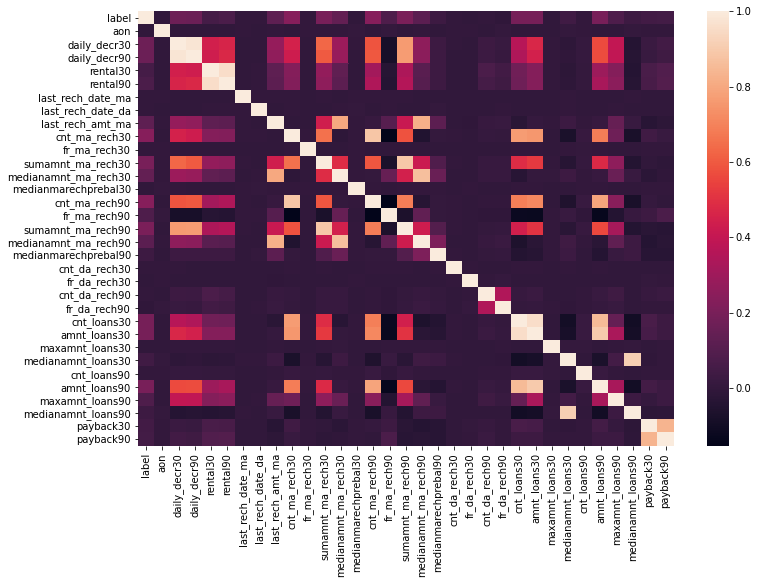

In [86]:
#Checking the correlation matrix
correlation_matrix = telecom_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix)


In [87]:
#As we can see there are many columns corelated to each other. So, we will remove highly corelated columns.
correlated_features = set()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
# Here the correlated_features will have one of the highly corelated features.

In [88]:
correlated_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech90'}

In [89]:
#Removing the correlates_features
telecom_data.drop(labels=correlated_features, axis=1, inplace=True)

In [90]:
# getting features and target data from the dataset
X = telecom_data.iloc[:,1:]
y = telecom_data['label']

In [91]:
# Scaling the features using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

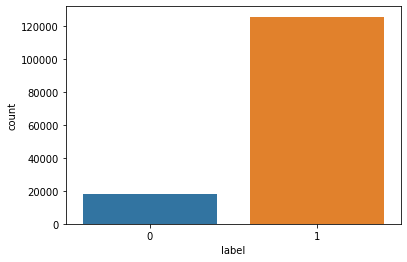

In [92]:
#Checking the class balance
sns.countplot(x = 'label', data = telecom_data)

As the data is Highly Imbalance we will have to resample the data

In [93]:
#OverSampling Data Using SMOTE(Synthetic Minority Oversampling Technique )
method = SMOTE(kind='regular')

In [94]:
X_resampled, y_resampled = method.fit_sample(X_scaled, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


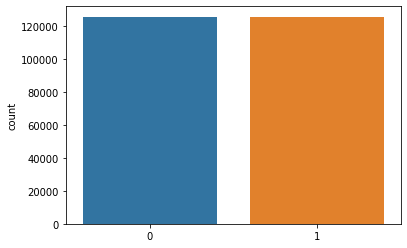

In [95]:
#Checking the class balance after sampling
sns.countplot(x = y_resampled)

In [96]:
#Splitting the data Using Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X_resampled ,y_resampled , random_state=22)

In [97]:
#Fitting Our Model Using Random Forest
rfclassifier = RandomForestClassifier(n_estimators=500, random_state=22)
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

Accuracy: 0.9401466836734694
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     31596
           1       0.94      0.94      0.94     31124

    accuracy                           0.94     62720
   macro avg       0.94      0.94      0.94     62720
weighted avg       0.94      0.94      0.94     62720



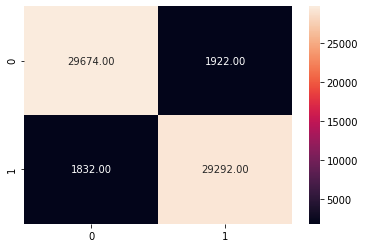

In [98]:
#Analysing the trained Classifier
y_pred = rfclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,fmt='.2f')

Accuracy: 0.75234375
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     34599
           1       0.70      0.78      0.74     28121

    accuracy                           0.75     62720
   macro avg       0.75      0.75      0.75     62720
weighted avg       0.76      0.75      0.75     62720



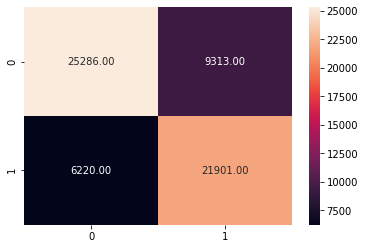

In [99]:
#Using Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,fmt='.2f')

Accuracy: 0.8850765306122449
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     32148
           1       0.87      0.89      0.88     30572

    accuracy                           0.89     62720
   macro avg       0.89      0.89      0.89     62720
weighted avg       0.89      0.89      0.89     62720



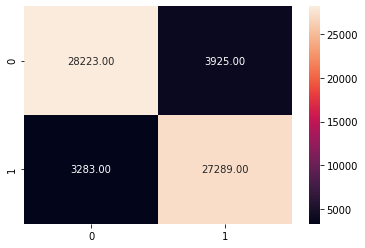

In [100]:
#Using Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,fmt='.2f')

After Analysing All the three model we an say that the Random Forest Classifier is giving the best Recall which is what we need for this Problem. So, we will select Random Forest Classifier. Also We want to Return the Probability if the coustomer will payback the loan amount or not. So, for that let us take an example of any random user to find the probability.

In [101]:
#For average user we will take the mean of all the dataset columns
rand_data=X_resampled[1515]
#We will have to reshape the data to 2D array
rand_data_respd=rand_data.reshape(1,-1)
pay_prob = rfclassifier.predict_proba(rand_data_respd)      #Predicting Probablity
print("Probability that the user will pay the loan is: ", pay_prob[0][1])


Probability that the user will pay the loan is:  0.772


So, we got that there is 73% probability that the given customer will pay the loan.